# Linear Regression from scratch

In [162]:
import numpy as np


def modified_X(x):
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    m, n = x.shape
    return np.insert(x.transpose(), 0, np.ones(n), axis=0)


class LinearRegressor:
    def __init__(self, epoch=1000, lr=0.01):
        self.w = None
        self.X_train = None
        self.epoch = epoch
        self.lr = lr

    def fit(self, X_train, y_train):
        self.X_train = modified_X(X_train)
        m, n = self.X_train.shape
        self.w = np.ones(m).reshape(-1, 1)
        y_train_cap = np.dot(self.X_train.transpose(), self.w)
        for i in range(self.epoch):
            self.w = self.w + self.lr * np.dot(self.X_train, (y_train - y_train_cap)) / n

    def predict(self,X_test):
        X_test = modified_X(X_test)
        return np.dot(X_test.transpose(), self.w)


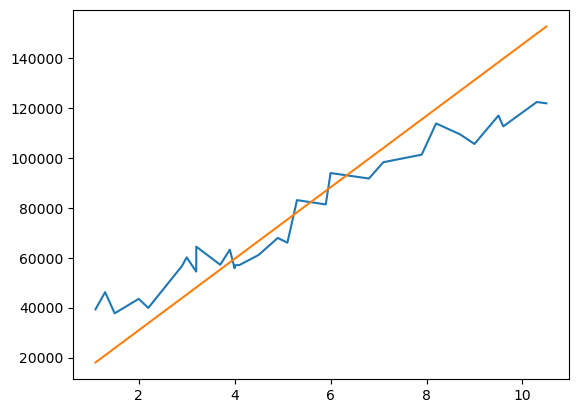

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(
    'https://raw.githubusercontent.com/sidgolangade/Linear-Regression-ML-Applications/master/Salary%20Prediction/Salary_Data.csv')

X = data['YearsExperience'].values
y = data['Salary'].values
y = y.reshape(-1, 1)
model = LinearRegressor(lr=.00006, epoch=500)
model.fit(X, y)
y_pred = model.predict(X)


plt.plot(X, y, X, y_pred)
plt.show()
